#  Lead Scoring Case Study

### Problem Statement

An education company named X Education sells online courses.The company markets its courses on several websites and search engines like Google. Once these people land on the website, they might browse the courses or fill up a form for the course or watch some videos. 
When these people fill up a form providing their email address or phone number, they are classified to be a **lead**.Once these leads are acquired, employees from the sales team start making calls, writing emails, etc. Through this process, some of the leads get converted while most do not. The typical lead conversion rate at X education is around 30%. 



#### Objective

30% is a poor conversion rate. The company intends to identify some 'Hot leads' to increase the conversion rate to a desirable 80%. If Hot leads are identified, the sales team can concentrate the efforts on these Hot leads and increase the conversion rate. 

The objective of this analysis is to build a logistic regression model that will assign a score to each lead and those with high lead scores can be targeted. The 80% conversion rate desired is nothing but the sensitivity of the model.Lead score must be between 0 to 100.

#### Overview

We are given with a dataset with columns like Lead source, lead quality, city of the lead, country of the lead etc. The column 'Converted' forms the Target variable. Converted has binary values : 1 is converted and 0 is not converted.

Steps in analysis:

1. **Data Cleaning** : 
    - Some columns have Select as a value. The customer/lead has not picked any value in that feature. 
    - There are considerable amount of null values in some columns 
    - A significant no. of columns have skewed data i.e. more than 90% of the column values are inclined towards one particular values. 
    - Datatypes are not correct. 
 
2. **Data Preparation** 
    - Create dummies for 8 features
    - Train test split
    - scaling of the numerical features
3. **Model building** :
       
       - logm1 : model with all features, train set is X_train
       - logm2 : model with RFE, X_train2_sm
        - logm3 : dropped Lead_Origin_Lead Add Form
        - logm4 : dropped Lead Source_NC_EDM
        - logm5 : dropped Last Notable Activity_SMS Sent
        -logm6 : dropped Last Notable Activity_Others
        -logm7 : Dropped City_Mumbai
        - logm8 : Dropped City_Others, City_Thane & Outskirts
        - logm9 : dropped Lead_Origin_Landing Page Submission and Specialization_Others
        - logm10 : Dropped Specialization_Operations Management
        - logm11 : Drop Specialization_Human Resource Management
        - logm12 : dropped Specialisation_Finance Management. 
        - logm13 : dropped Lead Source_Social Media

Model Log13 was taken as the final one and predictions were made on it. Metrics were calculated. Further, ROC curve was plotted. Accuracy, sensitivity, specificity curve was plotted and 0.35 was taken as the optimal cut off. Metrics were calculated for the same. 

Model was used on test set to make predictions and metrics were calculated. 

Further, a lead score was generated for each lead number. 



## 1. Importing the Libraries

In [1159]:
# Importing required libraries and packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Supress Warnings
import warnings
warnings.filterwarnings('ignore')

# for train test split
from sklearn.model_selection import train_test_split

from sklearn.preprocessing import StandardScaler

import statsmodels.api as sm ##statsmodel

# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

## 2. Reading Dataset

In [1160]:
leads = pd.read_csv("Leads.csv")
leads.head()

,Prospect ID,Lead Number,Lead Origin,Lead Source,Do Not Email,Do Not Call,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,...,Get updates on DM Content,Lead Profile,City,Asymmetrique Activity Index,Asymmetrique Profile Index,Asymmetrique Activity Score,Asymmetrique Profile Score,I agree to pay the amount through cheque,A free copy of Mastering The Interview,Last Notable Activity
0,7927b2df-8bba-4d29-b9a2-b6e0beafe620,660737,API,Olark Chat,No,No,0,0.00,0,0.00,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Modified
1,2a272436-5132-4136-86fa-dcc88c88f482,660728,API,Organic Search,No,No,0,5.00,674,2.50,...,No,Select,Select,02.Medium,02.Medium,15.00,15.00,No,No,Email Opened
2,8cc8c611-a219-4f35-ad23-fdfd2656bd8a,660727,Landing Page Submission,Direct Traffic,No,No,1,2.00,1532,2.00,...,No,Potential Lead,Mumbai,02.Medium,01.High,14.00,20.00,No,Yes,Email Opened
3,0cc2df48-7cf4-4e39-9de9-19797f9b38cc,660719,Landing Page Submission,Direct Traffic,No,No,0,1.00,305,1.00,...,No,Select,Mumbai,02.Medium,01.High,13.00,17.00,No,No,Modified
4,3256f628-e534-4826-9d63-4a8b88782852,660681,Landing Page Submission,Google,No,No,1,2.00,1428,1.00,...,No,Select,Mumbai,02.Medium,01.High,15.00,18.00,No,No,Modified


### 2.1 Inspecting the dataframe

In [1161]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4886
API                        3580
Lead Add Form               718
Lead Import                  55
Quick Add Form                1
Name: Lead Origin, dtype: int64

In [1162]:
leads.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9240 entries, 0 to 9239
Data columns (total 37 columns):
 #   Column                                         Non-Null Count  Dtype  
---  ------                                         --------------  -----  
 0   Prospect ID                                    9240 non-null   object 
 1   Lead Number                                    9240 non-null   int64  
 2   Lead Origin                                    9240 non-null   object 
 3   Lead Source                                    9204 non-null   object 
 4   Do Not Email                                   9240 non-null   object 
 5   Do Not Call                                    9240 non-null   object 
 6   Converted                                      9240 non-null   int64  
 7   TotalVisits                                    9103 non-null   float64
 8   Total Time Spent on Website                    9240 non-null   int64  
 9   Page Views Per Visit                           9103 

There arer some null values 

In [1163]:
leads.shape

(9240, 37)

## 3. Data Cleaning 

In [1164]:
# Checking duplicate rows
sum(leads.duplicated(subset = 'Lead Number')) == 0


True

There are No duplicate values in Dataset. Lead Number is a number assigned to each lead procured.

In [1165]:
# Checking Percentage null values in every column

round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
Tags                                            36.29
What matters most to you in choosing a course   29.32
Lead Profile                                    29.32
What is your current occupation                 29.11
Country                                         26.63
How did you hear about X Education              23.89
Specialization                                  15.56
City                                            15.37
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Do Not Email                                     0.00
Do Not Call                 

In [1166]:
### Checking for Select in columns and imputing it with null.

listselect = ['Specialization','Lead Profile','City','How did you hear about X Education']
leads[leads[listselect] == 'Select'] = np.nan

In [1167]:
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

How did you hear about X Education              78.46
Lead Profile                                    74.19
Lead Quality                                    51.59
Asymmetrique Profile Score                      45.65
Asymmetrique Activity Score                     45.65
Asymmetrique Profile Index                      45.65
Asymmetrique Activity Index                     45.65
City                                            39.71
Specialization                                  36.58
Tags                                            36.29
What matters most to you in choosing a course   29.32
What is your current occupation                 29.11
Country                                         26.63
TotalVisits                                      1.48
Page Views Per Visit                             1.48
Last Activity                                    1.11
Lead Source                                      0.39
Lead Origin                                      0.00
Lead Number                 

The Number of missing values have increased. 

### 3.1 Dropping columns 

How did you hear about X education has too many null values. It is best to drop it. 

In [1168]:
leads = leads.drop(['How did you hear about X Education'], axis = 1)

In [1169]:
##Checking the contents of Lead Profile

leads['Lead Profile'].value_counts(normalize = True)*100

Potential Lead                67.63
Other Leads                   20.42
Student of SomeSchool         10.10
Lateral Student                1.01
Dual Specialization Student    0.84
Name: Lead Profile, dtype: float64

This seems to be a sales team generated variable. Also it has very high missing values. This can be dropped and dropping it wont impact the model

In [1170]:
leads = leads.drop('Lead Profile', axis = 1)

In [1171]:
## Checking the contents of Lead Quality

leads['Lead Quality'].value_counts()

Might be             1560
Not Sure             1092
High in Relevance     637
Worst                 601
Low in Relevance      583
Name: Lead Quality, dtype: int64

This also seems to be a sales team generated variable. Also it has very high missing values. This can be dropped and dropping it wont impact the model

In [1172]:
leads = leads.drop('Lead Quality', axis = 1)

Asymmetrique Profile Score, Asymmetrique Activity Score, Asymmetrique Profile Index,Asymmetrique Activity Index are all sales team generated scores. They can be dropped. They have high number of missing values too. 

In [1173]:
leads = leads.drop(['Asymmetrique Profile Score','Asymmetrique Activity Score','Asymmetrique Profile Index','Asymmetrique Activity Index'], axis =1)         

In [1174]:
#Remove columns which has only one unique value

"""
Deleting the following columns as they have only one unique value and hence cannot be responsible in predicting a successful lead case

Magazine
Receive More Updates About Our Courses
Update me on Supply Chain Content
I agree to pay the amount through cheque
"""   
columns_to_drop=['Magazine','Receive More Updates About Our Courses','Update me on Supply Chain Content','I agree to pay the amount through cheque']
leads= leads.drop(columns_to_drop,axis=1)

### 3.2 Checking for skewed columns

In [1175]:
leads['Newspaper Article'].value_counts(normalize = True)*100

No    99.98
Yes    0.02
Name: Newspaper Article, dtype: float64

In [1176]:
leads['X Education Forums'].value_counts(normalize = True)*100

No    99.99
Yes    0.01
Name: X Education Forums, dtype: float64

In [1177]:
leads['Digital Advertisement'].value_counts(normalize = True)*100

No    99.96
Yes    0.04
Name: Digital Advertisement, dtype: float64

In [1178]:
leads['Get updates on DM Content'].value_counts(normalize = True)*100

No   100.00
Name: Get updates on DM Content, dtype: float64

In [1179]:
leads['Search'].value_counts(normalize = True)*100

No    99.85
Yes    0.15
Name: Search, dtype: float64

In [1180]:
leads['Newspaper'].value_counts(normalize = True)*100

No    99.99
Yes    0.01
Name: Newspaper, dtype: float64

In [1181]:
leads['Do Not Call'].value_counts(normalize = True)*100

No    99.98
Yes    0.02
Name: Do Not Call, dtype: float64

In [1182]:
leads['Through Recommendations'].value_counts(normalize = True)*100

No    99.92
Yes    0.08
Name: Through Recommendations, dtype: float64

The above columns have very skewed data. They need to be dropped. 

In [1183]:
leads = leads.drop(['Do Not Call','Get updates on DM Content','Digital Advertisement','Newspaper Article','X Education Forums','Through Recommendations','Search','Newspaper'], axis = 1)

In [1184]:
leads['What matters most to you in choosing a course'].value_counts(normalize = True)*100

Better Career Prospects     99.95
Flexibility & Convenience    0.03
Other                        0.02
Name: What matters most to you in choosing a course, dtype: float64

In [1185]:
leads['Do Not Email'].value_counts(normalize = True)*100

No    92.06
Yes    7.94
Name: Do Not Email, dtype: float64

Very skewed data, Columns are best dropped. 

In [1186]:
leads= leads.drop(['What matters most to you in choosing a course','Do Not Email'], axis = 1)

Tags is also a sales team generated variable. It can be removed. 

In [1187]:
leads = leads.drop('Tags', axis =1)

In [1188]:
round(100*(leads.isnull().sum()/len(leads)),2).sort_values(ascending=False)

City                                     39.71
Specialization                           36.58
What is your current occupation          29.11
Country                                  26.63
Page Views Per Visit                      1.48
TotalVisits                               1.48
Last Activity                             1.11
Lead Source                               0.39
Last Notable Activity                     0.00
A free copy of Mastering The Interview    0.00
Total Time Spent on Website               0.00
Converted                                 0.00
Lead Origin                               0.00
Lead Number                               0.00
Prospect ID                               0.00
dtype: float64

In [1189]:
leads = leads.drop('Prospect ID', axis=1) ## alphanumeric and has no significance to the model
leads = leads.set_index('Lead Number') ## Lead Number is set index 
leads.head()

,Lead Origin,Lead Source,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,Last Activity,Country,Specialization,What is your current occupation,City,A free copy of Mastering The Interview,Last Notable Activity
Lead Number,,,,,,,,,,,,,
660737,API,Olark Chat,0,0.00,0,0.00,Page Visited on Website,NaN,NaN,Unemployed,NaN,No,Modified
660728,API,Organic Search,0,5.00,674,2.50,Email Opened,India,NaN,Unemployed,NaN,No,Email Opened
660727,Landing Page Submission,Direct Traffic,1,2.00,1532,2.00,Email Opened,India,Business Administration,Student,Mumbai,Yes,Email Opened
660719,Landing Page Submission,Direct Traffic,0,1.00,305,1.00,Unreachable,India,Media and Advertising,Unemployed,Mumbai,No,Modified
660681,Landing Page Submission,Google,1,2.00,1428,1.00,Converted to Lead,India,NaN,Unemployed,Mumbai,No,Modified


In [1190]:
leads.shape

(9240, 13)

### 3.3 Treating features and aggregating those with low percentage representation. 

In [1191]:
## treating City Feature
leads['City'].isnull().sum()/len(leads)*100

39.70779220779221

There are around 40% null values 

In [1192]:
leads['City'].fillna("Unknown", inplace = True) 
leads['City'].value_counts(normalize = True)*100

Unknown                       39.71
Mumbai                        34.87
Thane & Outskirts              8.14
Other Cities                   7.42
Other Cities of Maharashtra    4.95
Other Metro Cities             4.11
Tier II Cities                 0.80
Name: City, dtype: float64

Null values are replaced with Unknown. Dropping 40% of data would lead to loss of important data and hence it is best to impute it. Further, the values which constitute less than 5% of values are clubbed together as "Others".

In [1193]:
## adding all those below 5% as Others

city = ['Other Cities of Maharashtra','Other Metro Cities','Tier II Cities','Other Cities']

leads['City'].replace(city, 'Others', inplace =True)
leads['City'].value_counts(normalize = True)*100

Unknown             39.71
Mumbai              34.87
Others              17.28
Thane & Outskirts    8.14
Name: City, dtype: float64

In [1194]:
### Treating Specialization 

In [1195]:
leads['Specialization'].isnull().sum()/len(leads)*100

36.58008658008658

There are aroudn 37% null values in Specialization 

In [1196]:
leads['Specialization'].fillna("Unknown", inplace = True)
leads['Specialization'].value_counts(normalize = True)*100

Unknown                             36.58
Finance Management                  10.56
Human Resource Management            9.18
Marketing Management                 9.07
Operations Management                5.44
Business Administration              4.36
IT Projects Management               3.96
Supply Chain Management              3.78
Banking, Investment And Insurance    3.66
Media and Advertising                2.20
Travel and Tourism                   2.20
International Business               1.93
Healthcare Management                1.72
Hospitality Management               1.23
E-COMMERCE                           1.21
Retail Management                    1.08
Rural and Agribusiness               0.79
E-Business                           0.62
Services Excellence                  0.43
Name: Specialization, dtype: float64

Clubbing all those below 5% as 'others'.

In [1197]:
spec = ['Business Administration','IT Projects Management','Supply Chain Management','Banking, Investment And Insurance','Media and Advertising',
        'Travel and Tourism','International Business','Healthcare Management','Hospitality Management','E-COMMERCE','Retail Management',
        'Rural and Agribusiness','E-Business','Services Excellence']
        
leads['Specialization'].replace(spec, 'Others', inplace =True)
leads['Specialization'].value_counts(normalize = True)*100

Unknown                     36.58
Others                      29.17
Finance Management          10.56
Human Resource Management    9.18
Marketing Management         9.07
Operations Management        5.44
Name: Specialization, dtype: float64

In [1198]:
## Treating Country

To restrict our analysis, let's consider only two types of countries India and outside India.

In [1199]:
leads['Country'] = leads['Country'].apply(lambda x: 'India' if x=='India' else 'Outside India')
leads['Country'].value_counts(normalize = True)*100

India           70.26
Outside India   29.74
Name: Country, dtype: float64

In [1200]:
### Inspecting Last Activity
leads['Last Activity'].value_counts(normalize = True)*100

Email Opened                   37.62
SMS Sent                       30.04
Olark Chat Conversation        10.65
Page Visited on Website         7.00
Converted to Lead               4.68
Email Bounced                   3.57
Email Link Clicked              2.92
Form Submitted on Website       1.27
Unreachable                     1.02
Unsubscribed                    0.67
Had a Phone Conversation        0.33
Approached upfront              0.10
View in browser link Clicked    0.07
Email Received                  0.02
Email Marked Spam               0.02
Resubscribed to emails          0.01
Visited Booth in Tradeshow      0.01
Name: Last Activity, dtype: float64

Adding all those values below 5% as others

In [1201]:
activity = ['Converted to Lead','Email Bounced','Email Link Clicked','Form Submitted on Website','Unreachable',
            'Unsubscribed','Had a Phone Conversation','Approached upfront','View in browser link Clicked',
            'Email Received','Email Marked Spam','Visited Booth in Tradeshow','Resubscribed to emails']

leads['Last Activity'].replace(activity, 'Others', inplace =True)
leads['Last Activity'].value_counts(normalize = True)*100

Email Opened              37.62
SMS Sent                  30.04
Others                    14.69
Olark Chat Conversation   10.65
Page Visited on Website    7.00
Name: Last Activity, dtype: float64

In [1202]:
## Treating What is your current occupation

In [1203]:
leads['What is your current occupation'].isnull().sum()/len(leads)*100

29.11255411255411

There are around 30% null values. They cannot be dropped as that will lead to a lot of loss of data. Neither can this column be dropped as it forms an important feature in the model building.

In [1204]:
## Checking the contents of this feature

leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed             85.50
Working Professional   10.78
Student                 3.21
Other                   0.24
Housewife               0.15
Businessman             0.12
Name: What is your current occupation, dtype: float64

Null values are hence replaced with Unknown.

In [1205]:
leads['What is your current occupation'].fillna("Unknown", inplace = True)
leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed             60.61
Unknown                29.11
Working Professional    7.64
Student                 2.27
Other                   0.17
Housewife               0.11
Businessman             0.09
Name: What is your current occupation, dtype: float64

Further all those entries with less than 5% are clubbed as "Others"


In [1206]:
occupation = ['Other','Housewife','Businessman','Student']
leads['What is your current occupation'].replace(occupation, 'Others', inplace =True)
leads['What is your current occupation'].value_counts(normalize = True)*100

Unemployed             60.61
Unknown                29.11
Working Professional    7.64
Others                  2.64
Name: What is your current occupation, dtype: float64

In [1207]:
### Treating Last Notable activity

In [1208]:
leads['Last Notable Activity'].value_counts(normalize = True)*100

Modified                       36.87
Email Opened                   30.60
SMS Sent                       23.51
Page Visited on Website         3.44
Olark Chat Conversation         1.98
Email Link Clicked              1.87
Email Bounced                   0.65
Unsubscribed                    0.51
Unreachable                     0.35
Had a Phone Conversation        0.15
Email Marked Spam               0.02
Approached upfront              0.01
Form Submitted on Website       0.01
View in browser link Clicked    0.01
Resubscribed to emails          0.01
Email Received                  0.01
Name: Last Notable Activity, dtype: float64

Combining all the Last notable entries below 5% as Others

In [1209]:
notable = ['Page Visited on Website','Olark Chat Conversation','Email Link Clicked','Email Bounced',
           'Unsubscribed','Unreachable','Had a Phone Conversation',
           'Email Marked Spam','View in browser link Clicked','Form Submitted on Website','Approached upfront',
           'Resubscribed to emails','Email Received']
leads['Last Notable Activity'].replace(notable, 'Others', inplace =True)
leads['Last Notable Activity'].value_counts(normalize = True)*100


Modified       36.87
Email Opened   30.60
SMS Sent       23.51
Others          9.03
Name: Last Notable Activity, dtype: float64

In [1210]:
### Checking for null values after all the data cleaning process.

In [1211]:
round(leads.isnull().sum()/len(leads),2)*100

Lead Origin                              0.00
Lead Source                              0.00
Converted                                0.00
TotalVisits                              1.00
Total Time Spent on Website              0.00
Page Views Per Visit                     1.00
Last Activity                            1.00
Country                                  0.00
Specialization                           0.00
What is your current occupation          0.00
City                                     0.00
A free copy of Mastering The Interview   0.00
Last Notable Activity                    0.00
dtype: float64

### 3.4 Dropping rows with Null values and checking retention percentage

In [1212]:
### remove the rows with null values

In [1213]:
leads = leads.dropna(how='any',axis=0) 

In [1214]:
leads.shape[0]/9240*100

98.2034632034632

98% of rows are retained. Only 2% were dropped. 

In [1215]:
leads.dtypes

Lead Origin                                object
Lead Source                                object
Converted                                   int64
TotalVisits                               float64
Total Time Spent on Website                 int64
Page Views Per Visit                      float64
Last Activity                              object
Country                                    object
Specialization                             object
What is your current occupation            object
City                                       object
A free copy of Mastering The Interview     object
Last Notable Activity                      object
dtype: object

All datatypes are correct

In [1216]:
# Identifying if any row exists with only null values
leads.isnull().all(axis=1).any()

False

No row have all null values

## 4. EDA

### 4.1 Checking for Outliers

In [1217]:
leads.describe(percentiles=[ .25, .5, .75, .90, .95, .99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.46,482.89,2.37
std,0.49,4.86,545.26,2.16
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
90%,1.00,7.00,1373.00,5.00
95%,1.00,10.00,1557.00,6.00
99%,1.00,17.00,1839.00,9.00


Total visits and Page views per visit have outliers on the higher range. There is an abrupt jump from 99% to the maximum value

In [1218]:
### Inspecting all the numeric columns 

In [1219]:
leads.Converted.value_counts(normalize = True)*100

0   62.14
1   37.86
Name: Converted, dtype: float64

38% were converted. This is the target column and doesnt need any processing. 

In [1220]:
### Inspecting TotalVisits

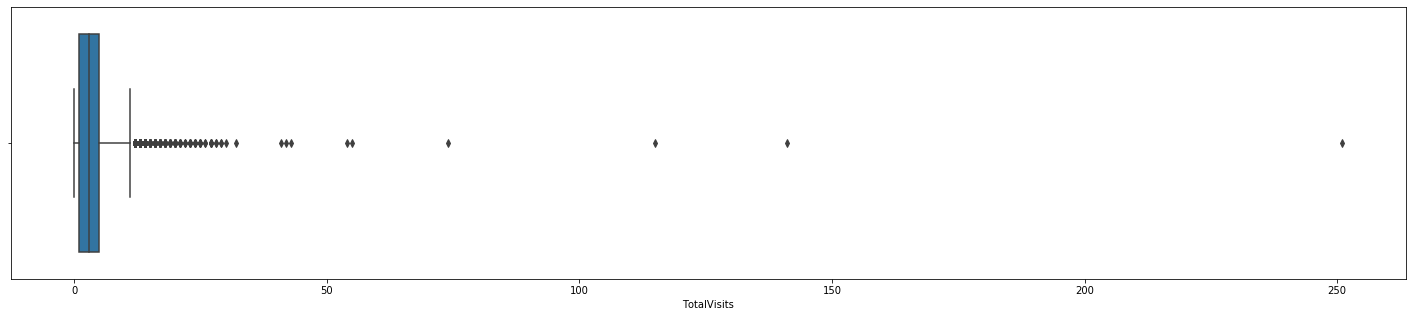

In [1221]:
plt.figure(figsize = (25,5))
sns.boxplot(x = 'TotalVisits', data = leads)

There are many outliers. 

In [1222]:
## treating Total Time Spent on Website

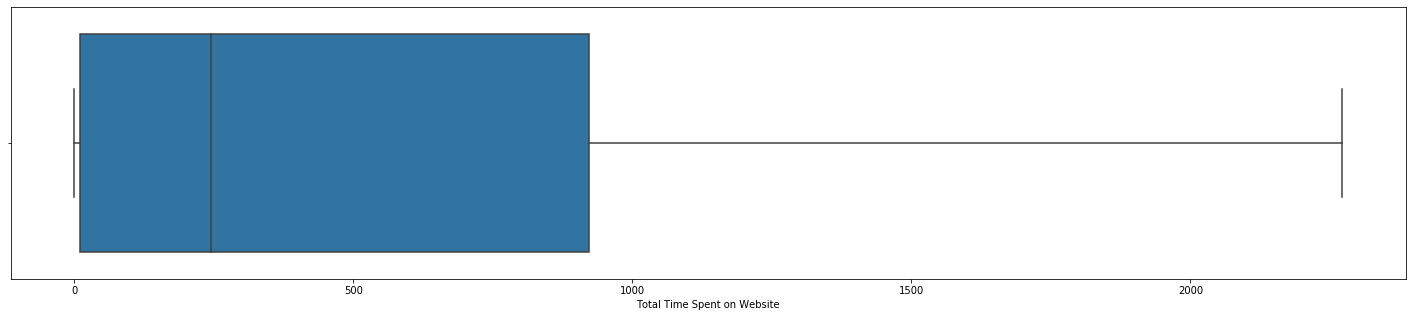

In [1223]:
plt.figure(figsize = (25,5))
sns.boxplot(x = 'Total Time Spent on Website', data = leads)

There are no Outliers in Total Time Spent on Website. 

In [1224]:
## Inspecting Page Views Per Visit

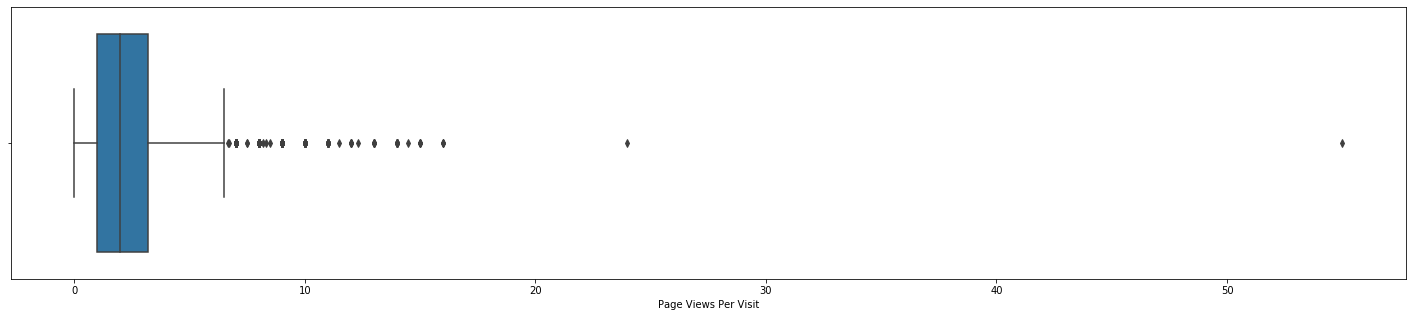

In [1225]:
plt.figure(figsize = (25,5))
sns.boxplot(x = 'Page Views Per Visit', data = leads)

In [1226]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

There are outliers in this Page Views Per Visit. 

### 4.2 Capping all outliers at 99th percentile

In [1227]:
cap1 = leads['TotalVisits'].quantile(.99)
condition = leads['TotalVisits'] > cap1 
leads.loc[condition, 'TotalVisits'] = cap1

In [1228]:
cap1 = leads['Page Views Per Visit'].quantile(.99)
condition = leads['Page Views Per Visit'] > cap1 
leads.loc[condition, 'Page Views Per Visit'] = cap1

In [1229]:
leads.describe(percentiles = [0.25,0.50,0.75,0.99])

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit
count,9074.00,9074.00,9074.00,9074.00
mean,0.38,3.34,482.89,2.34
std,0.49,3.25,545.26,1.98
min,0.00,0.00,0.00,0.00
25%,0.00,1.00,11.00,1.00
50%,0.00,3.00,246.00,2.00
75%,1.00,5.00,922.75,3.20
99%,1.00,17.00,1839.00,9.00
max,1.00,17.00,2272.00,9.00


In [1230]:
leads['Lead Origin'].value_counts()

Landing Page Submission    4885
API                        3578
Lead Add Form               581
Lead Import                  30
Name: Lead Origin, dtype: int64

### 4.3 Univariate analysis

In [1231]:
def univar(feature,x,y):
    plt.figure(figsize = (x,y))
    plt.xticks(rotation = 45)
    sns.countplot(x = leads[feature], data = leads)
    plt.show()

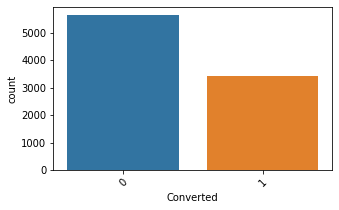

In [1232]:
univar('Converted',5,3)

conversion rate is pretty low as evident from above plot. 

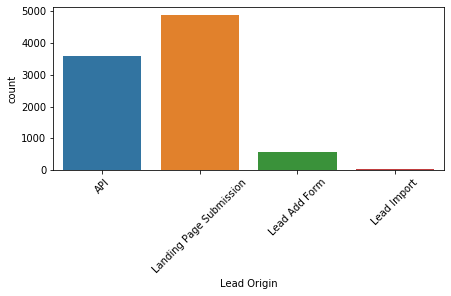

In [1233]:
univar('Lead Origin',7,3)

Landing Page submission has the highest count in lead origin.

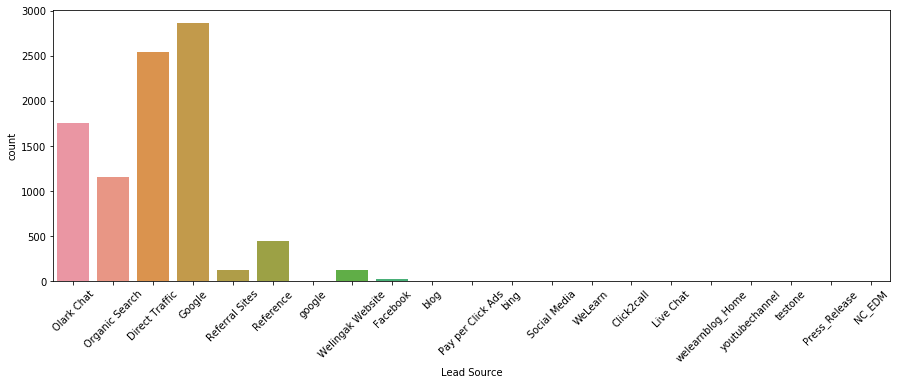

In [1234]:
univar('Lead Source',15,5)

Google is the highest lead source while welingak website has very low leads. Reference has higher leads than Welingak Website but lower than others such as google. 

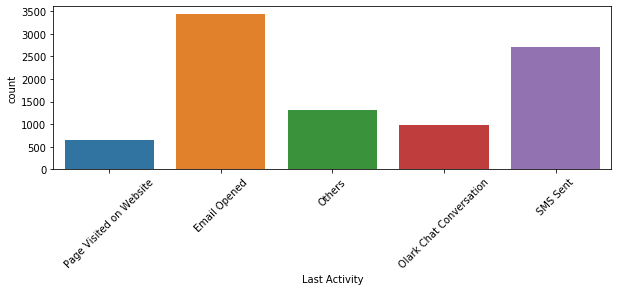

In [1235]:
univar('Last Activity',10,3)

Last Activity for most leads is Email Opened. 

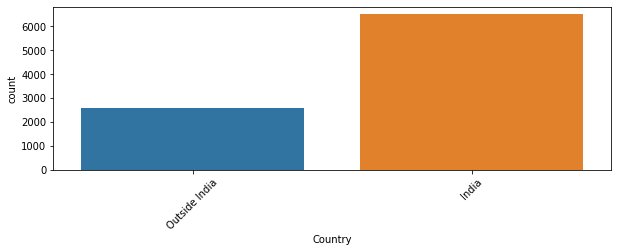

In [1236]:
univar('Country',10,3)

A large no. of leads came from India. 

### 4.4 Bivariate Analysis

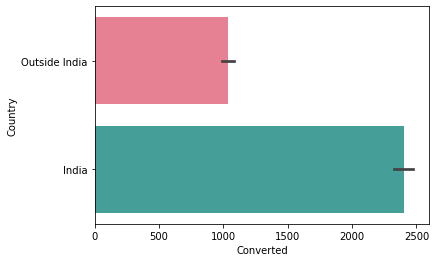

In [1237]:
sns.barplot(y='Country', x='Converted', palette='husl', data=leads, estimator=np.sum)

India has more conversions than Outside India

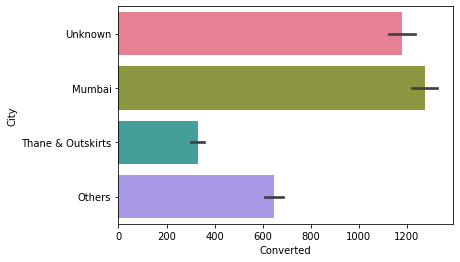

In [1238]:
sns.barplot(y='City', x='Converted', palette='husl', data=leads, estimator=np.sum)

Mumbai has the highest number of conversions.

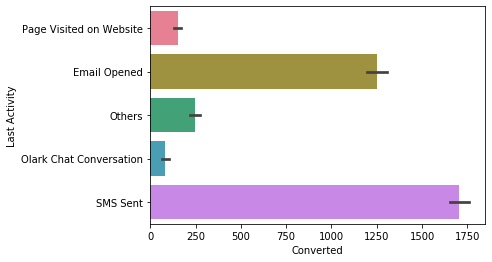

In [1239]:
sns.barplot(y='Last Activity', x='Converted', palette='husl', data=leads, estimator=np.sum)

SMS sent was the most common last activity 

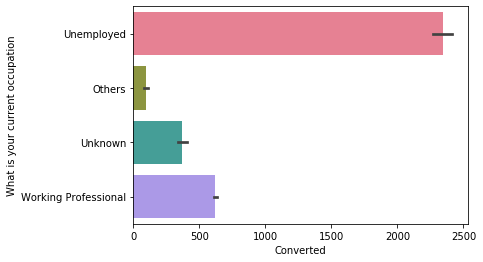

In [1240]:
sns.barplot(y='What is your current occupation', x='Converted', palette='husl', data=leads, estimator=np.sum)

Unemployed constitute a significant percentage of conversions

### 4.5 Checking for Correlation 

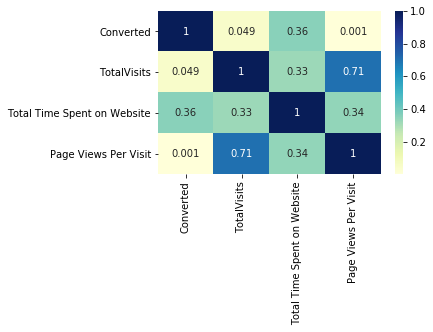

In [1241]:
plt.figure(figsize = (5,3))
sns.heatmap(leads.corr(), annot = True, cmap="YlGnBu")
plt.show()

From the above Heatmap, the Total time spent on the website has a high correlation with converted. 

## 5. Data Preparation 

In [1242]:
leads.columns 

Index(['Lead Origin', 'Lead Source', 'Converted', 'TotalVisits',
       'Total Time Spent on Website', 'Page Views Per Visit', 'Last Activity',
       'Country', 'Specialization', 'What is your current occupation', 'City',
       'A free copy of Mastering The Interview', 'Last Notable Activity'],
      dtype='object')

In [1243]:
## converting yes and no to 1 and 0

listone = ['A free copy of Mastering The Interview']

def mapping(x):
    return x.map({'Yes':1, 'No':0})

leads[listone] = leads[listone].apply(mapping)

### 5.1 Dummies creation 

In [1244]:
# Creating a dummy variable for some of the categorical variables and dropping the first one.
dummy1 = pd.get_dummies(leads[['Lead Origin','Lead Source','Country','Last Notable Activity']], drop_first=True)

# Adding the results to the master dataframe
leads = pd.concat([leads, dummy1], axis=1)
leads.shape

(9074, 40)

Creating dummy variables for the remaining categorical variables and dropping the level called 'Unknown' which represents null/select values.

In [1245]:
# Creating dummy variables for the variable 'What is your current occupation'
ml = pd.get_dummies(leads['What is your current occupation'], prefix='What is your current occupation')
# Dropping the level called 'Unknown' which represents null/select values
ml1 = ml.drop(['What is your current occupation_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml1], axis=1)

In [1246]:
# Creating dummy variables for the variable 'Specialization'
ml = pd.get_dummies(leads['Specialization'], prefix='Specialization')
# Dropping the level called 'Unknown' which represents null/select values
ml2 = ml.drop(['Specialization_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml2], axis=1)

In [1247]:
# Creating dummy variables for the variable 'City'
ml = pd.get_dummies(leads['City'], prefix='City')
# Dropping the level called 'Unknown' which represents null/select values
ml3 = ml.drop(['City_Unknown'], 1)
#Adding the results to the master dataframe
leads = pd.concat([leads,ml3], axis=1)

In [1248]:
# Creating dummy variables for the variable 'Last Activity'
ml = pd.get_dummies(leads['Last Activity'], prefix='Last Activity')
#Adding the results to the master dataframe
leads = pd.concat([leads,ml], axis=1)

In [1249]:
leads.shape

(9074, 56)

#### Dropping the parent variables

In [1250]:
# We have created dummies for the below variables, so we can drop them
leads = leads.drop(['Lead Origin','Lead Source','Country','Last Notable Activity','What is your current occupation','Specialization','City','Last Activity'], 1)
leads.shape

(9074, 48)

In [1251]:
leads.head()

,Converted,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,...,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0,0.00,0,0.00,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
660728,0,5.00,674,2.50,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660727,1,2.00,1532,2.00,1,1,0,0,1,0,...,0,1,1,0,0,1,0,0,0,0
660719,0,1.00,305,1.00,0,1,0,0,1,0,...,0,1,1,0,0,0,0,1,0,0
660681,1,2.00,1428,1.00,0,1,0,0,0,0,...,0,0,1,0,0,0,0,1,0,0


In [1252]:
# Ensuring there are no categorical columns left in the dataframe
cols = leads.columns
num_cols = leads._get_numeric_data().columns
list(set(cols) - set(num_cols))

[]

### 5.2 Test - Train Split

In [1253]:
# Putting feature variable to X
X = leads.drop(['Converted'], axis=1)

X.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
660737,0.00,0,0.00,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
660728,5.00,674,2.50,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
660727,2.00,1532,2.00,1,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
660719,1.00,305,1.00,0,1,0,0,1,0,0,...,0,1,1,0,0,0,0,1,0,0
660681,2.00,1428,1.00,0,1,0,0,0,0,1,...,0,0,1,0,0,0,0,1,0,0


In [1254]:
# Putting response variable to y
y = leads['Converted']

y.head()

Lead Number
660737    0
660728    0
660727    1
660719    0
660681    1
Name: Converted, dtype: int64

In [1255]:
# Splitting the data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.7, test_size=0.3, random_state=100)

### 5.3 Scaling

In [1256]:
scaler = StandardScaler()

X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_train[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_train.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
630949,-0.42,-0.16,-0.18,1,1,0,0,1,0,0,...,0,0,1,0,0,1,0,0,0,0
649355,-0.42,-0.54,-0.18,0,1,0,0,1,0,0,...,0,0,1,0,0,0,0,1,0,0
579735,-1.03,-0.89,-1.18,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
614238,-0.42,1.64,-0.18,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1
588625,0.51,2.02,0.07,0,1,0,0,1,0,0,...,0,0,0,1,0,0,0,0,0,1


The three numerical features- TotalVisits','Total Time Spent on Website','Page Views Per Visit are scaled.

In [1257]:
X_train.describe()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
count,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,...,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00,6351.00
mean,0.00,0.00,0.00,0.32,0.54,0.07,0.00,0.28,0.00,0.32,...,0.05,0.29,0.35,0.17,0.08,0.37,0.11,0.14,0.07,0.31
std,1.00,1.00,1.00,0.46,0.50,0.25,0.06,0.45,0.06,0.47,...,0.23,0.45,0.48,0.38,0.27,0.48,0.31,0.35,0.26,0.46
min,-1.03,-0.89,-1.18,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,-0.73,-0.87,-0.68,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
50%,-0.11,-0.44,-0.18,0.00,1.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
75%,0.51,0.80,0.49,1.00,1.00,0.00,0.00,1.00,0.00,1.00,...,0.00,1.00,1.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
max,4.21,3.20,3.34,1.00,1.00,1.00,1.00,1.00,1.00,1.00,...,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00,1.00


In [1258]:
### Checking the Lead Conversion Rate
converted = (sum(leads['Converted'])/len(leads['Converted'].index))*100
converted

37.85541106458012

This is close to the conversion rate mentioned in the problem statement i.e. 30%

## 6. Model Building

In [1259]:
# Logistic regression model
logm1 = sm.GLM(y_train,(sm.add_constant(X_train)), family = sm.families.Binomial())
print(logm1.fit().summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6305
Model Family:                Binomial   Df Model:                           45
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                    nan
Date:                Mon, 07 Sep 2020   Deviance:                          nan
Time:                        22:56:12   Pearson chi2:                 6.63e+18
No. Iterations:                   100                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

### 6.1 Feature Selection Using RFE

In [1260]:
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

In [1261]:
from sklearn.feature_selection import RFE
rfe = RFE(logreg, 25)             # running RFE with 25 variables as output
rfe = rfe.fit(X_train, y_train)

In [1262]:
rfe.support_

array([False,  True, False, False,  True,  True, False, False, False,
       False, False,  True,  True, False, False, False,  True, False,
        True, False,  True, False, False, False, False, False, False,
       False,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True, False,
       False,  True])

In [1263]:
list(zip(X_train.columns, rfe.support_, rfe.ranking_))

[('TotalVisits', False, 8),
 ('Total Time Spent on Website', True, 1),
 ('Page Views Per Visit', False, 9),
 ('A free copy of Mastering The Interview', False, 14),
 ('Lead Origin_Landing Page Submission', True, 1),
 ('Lead Origin_Lead Add Form', True, 1),
 ('Lead Origin_Lead Import', False, 22),
 ('Lead Source_Direct Traffic', False, 3),
 ('Lead Source_Facebook', False, 6),
 ('Lead Source_Google', False, 7),
 ('Lead Source_Live Chat', False, 10),
 ('Lead Source_NC_EDM', True, 1),
 ('Lead Source_Olark Chat', True, 1),
 ('Lead Source_Organic Search', False, 4),
 ('Lead Source_Pay per Click Ads', False, 16),
 ('Lead Source_Press_Release', False, 17),
 ('Lead Source_Reference', True, 1),
 ('Lead Source_Referral Sites', False, 5),
 ('Lead Source_Social Media', True, 1),
 ('Lead Source_WeLearn', False, 23),
 ('Lead Source_Welingak Website', True, 1),
 ('Lead Source_bing', False, 21),
 ('Lead Source_blog', False, 19),
 ('Lead Source_google', False, 13),
 ('Lead Source_testone', False, 15),
 (

In [1264]:
# Columns with Top RFE ranking i.e. 'True'
col = X_train.columns[rfe.support_]
col

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'City_Mumbai', 'City_Others', 'City_Thane & Outskirts',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [1265]:
# Columns which do not support i.e. 'False'
X_train.columns[~rfe.support_]

Index(['TotalVisits', 'Page Views Per Visit',
       'A free copy of Mastering The Interview', 'Lead Origin_Lead Import',
       'Lead Source_Direct Traffic', 'Lead Source_Facebook',
       'Lead Source_Google', 'Lead Source_Live Chat',
       'Lead Source_Organic Search', 'Lead Source_Pay per Click Ads',
       'Lead Source_Press_Release', 'Lead Source_Referral Sites',
       'Lead Source_WeLearn', 'Lead Source_bing', 'Lead Source_blog',
       'Lead Source_google', 'Lead Source_testone',
       'Lead Source_welearnblog_Home', 'Lead Source_youtubechannel',
       'Country_Outside India', 'Last Activity_Others',
       'Last Activity_Page Visited on Website'],
      dtype='object')

### 6.2. Model 2 : Assessing the model with StatsModels using RFE columns

In [1266]:
X_train2_sm = sm.add_constant(X_train[col])
logm2 = sm.GLM(y_train,X_train2_sm, family = sm.families.Binomial())
res2 = logm2.fit()
print(res2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6325
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2550.8
Date:                Mon, 07 Sep 2020   Deviance:                       5101.6
Time:                        22:56:15   Pearson chi2:                 6.12e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1267]:
# Getting the predicted values on the train set
y_train_pred = res2.predict(X_train2_sm)
y_train_pred[:10]

Lead Number
630949   0.09
649355   0.48
579735   0.35
614238   0.74
588625   0.79
646388   0.79
632041   0.04
612248   0.97
591797   0.87
646673   0.76
dtype: float64

In [1268]:
# reshaping the numpy array containing predicted values
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09424819, 0.47528082, 0.3467971 , 0.73738834, 0.78812767,
       0.79009996, 0.04019853, 0.97182987, 0.8744259 , 0.75706878])

#### 6.2.1.Creating a dataframe with the actual flag and the predicted probabilities

In [1269]:
y_train_pred = pd.DataFrame({'Converted':y_train.values, 'Conversion_Prob':y_train_pred})
y_train_pred['LeadID'] = y_train.index
y_train_pred.head()

,Converted,Conversion_Prob,LeadID
0,0,0.09,630949
1,0,0.48,649355
2,0,0.35,579735
3,1,0.74,614238
4,1,0.79,588625


##### Creating new column 'predicted' with 1 if Conversion_Prob > 0.5 else 0

In [1270]:
y_train_pred['predicted'] = y_train_pred.Conversion_Prob.map(lambda x: 1 if x > 0.5 else 0)

# Let's see the head
y_train_pred.head()

,Converted,Conversion_Prob,LeadID,predicted
0,0,0.09,630949,0
1,0,0.48,649355,0
2,0,0.35,579735,0
3,1,0.74,614238,1
4,1,0.79,588625,1


#### 6.2.2. Metrics of this model are as follows 

In [1271]:
from sklearn import metrics

##### Creating Confusion Metrics

In [1272]:
# Confusion matrix 
confusion = metrics.confusion_matrix(y_train_pred.Converted, y_train_pred.predicted )
print(confusion)

[[3463  442]
 [ 721 1725]]


In [1273]:
 #Predicted     Not_Conv    Conv 
 #Actual
 #Not_Conv        3463      442
 #Conv            721       1725

In [1274]:
# Let's check the overall accuracy.
print('Accuracy of the model:', (metrics.accuracy_score(y_train_pred.Converted, y_train_pred.predicted))*100)

Accuracy of the model: 81.68792316170682


In [1275]:
TP = confusion[1,1] # true positive 
TN = confusion[0,0] # true negatives
FP = confusion[0,1] # false positives
FN = confusion[1,0] # false negatives

In [1276]:
Sensitivity = TP/float(TP+FN)
print('Sensitivity of model is', Sensitivity*100)

Sensitivity of model is 70.5233033524121


Sensitivity of this model is 70%

#### Checking VIFs

In [1277]:
# Check for the VIF values of the feature variables. 
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [1278]:
X_train2_sm.columns

Index(['const', 'Total Time Spent on Website',
       'Lead Origin_Landing Page Submission', 'Lead Origin_Lead Add Form',
       'Lead Source_NC_EDM', 'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'City_Mumbai', 'City_Others', 'City_Thane & Outskirts',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [1279]:
X_train2_sm.shape

(6351, 26)

In [1280]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif = pd.DataFrame()
vif['Features'] = X_train2_sm.columns
vif['VIF'] = [variance_inflation_factor(X_train2_sm.values, i) for i in range(X_train2_sm.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
3,Lead Origin_Lead Add Form,58.44
6,Lead Source_Reference,45.66
0,const,32.05
8,Lead Source_Welingak Website,15.28
11,Last Notable Activity_SMS Sent,7.05
20,City_Mumbai,5.25
23,Last Activity_Email Opened,5.04
25,Last Activity_SMS Sent,4.79
19,Specialization_Others,4.72
9,Last Notable Activity_Modified,4.14


VIF that is less than 5 is generally preferred. Let's start by dropping the first highest VIF Value variable. 

In [1281]:
#Dropping highly correlated variables starting with Last Activity_Email Opened

X_train3 = X_train2_sm.drop('Lead Origin_Lead Add Form',axis=1)

In [1282]:
# Calculating once again VIF
vif = pd.DataFrame()
vif['Features'] = X_train3.columns
vif['VIF'] = [variance_inflation_factor(X_train3.values, i) for i in range(X_train3.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.05
10,Last Notable Activity_SMS Sent,7.05
19,City_Mumbai,5.25
22,Last Activity_Email Opened,5.04
24,Last Activity_SMS Sent,4.79
18,Specialization_Others,4.72
8,Last Notable Activity_Modified,4.14
2,Lead Origin_Landing Page Submission,4.03
20,City_Others,3.65
9,Last Notable Activity_Others,2.81


VIF Values have dropped significantly but there are still many with high VIFs. Lets further analyse them.

### 6.3 Model 3 : dropped Lead Origin_Lead Add Form

In [1283]:
logm3 = sm.GLM(y_train,X_train3, family = sm.families.Binomial())
res3 = logm3.fit()
print(res3.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6326
Model Family:                Binomial   Df Model:                           24
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2551.8
Date:                Mon, 07 Sep 2020   Deviance:                       5103.6
Time:                        22:56:16   Pearson chi2:                 6.12e+03
No. Iterations:                    19                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

P-value of Lead Source_NC_EDM is very high making it highly insignificant.

### 6.4 Model 4 after dropping Lead Source_NC_EDM

In [1284]:
X_train4 = X_train3.drop('Lead Source_NC_EDM', axis = 1)

In [1285]:
logm4 = sm.GLM(y_train,X_train4, family = sm.families.Binomial())
res4 = logm4.fit()
print(res4.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6327
Model Family:                Binomial   Df Model:                           23
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2553.3
Date:                Mon, 07 Sep 2020   Deviance:                       5106.5
Time:                        22:56:16   Pearson chi2:                 6.12e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1286]:
vif = pd.DataFrame()
vif['Features'] = X_train4.columns
vif['VIF'] = [variance_inflation_factor(X_train4.values, i) for i in range(X_train4.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,32.04
9,Last Notable Activity_SMS Sent,7.05
18,City_Mumbai,5.25
21,Last Activity_Email Opened,5.04
23,Last Activity_SMS Sent,4.79
17,Specialization_Others,4.72
7,Last Notable Activity_Modified,4.14
2,Lead Origin_Landing Page Submission,4.03
19,City_Others,3.65
8,Last Notable Activity_Others,2.81


Last Notable Activity_SMS Sent has a VIF of 7.05. It can be dropped. 

### 6.5 Model 5 : Dropping Last Notable Activity_SMS

In [1287]:
X_train5 = X_train4.drop('Last Notable Activity_SMS Sent', axis =1)

logm5 = sm.GLM(y_train,X_train5, family = sm.families.Binomial())
res5 = logm5.fit()
print(res5.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6328
Model Family:                Binomial   Df Model:                           22
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2560.8
Date:                Mon, 07 Sep 2020   Deviance:                       5121.7
Time:                        22:56:16   Pearson chi2:                 6.19e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Last Notable Activity_Others has a high P-value making it statiscally insignificant.

### 6.6. Model 6 : Dropped Last Notable Activity_Others

In [1288]:
X_train6 = X_train5.drop('Last Notable Activity_Others', axis = 1)

logm6 = sm.GLM(y_train,X_train6, family = sm.families.Binomial())
res6 = logm6.fit()
print(res6.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6329
Model Family:                Binomial   Df Model:                           21
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2561.0
Date:                Mon, 07 Sep 2020   Deviance:                       5122.1
Time:                        22:56:16   Pearson chi2:                 6.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1289]:
# Cheaking for VIF for this dataframe
vif = pd.DataFrame()
vif['Features'] = X_train6.columns
vif['VIF'] = [variance_inflation_factor(X_train6.values, i) for i in range(X_train6.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.68
16,City_Mumbai,5.25
15,Specialization_Others,4.71
2,Lead Origin_Landing Page Submission,4.02
17,City_Others,3.65
11,Specialization_Finance Management,2.79
12,Specialization_Human Resource Management,2.48
13,Specialization_Marketing Management,2.33
18,City_Thane & Outskirts,2.29
19,Last Activity_Email Opened,2.07


VIF of 5 indicates high correlation. Removing that feature.

### 6.7 Model 7 : Dropping City_Mumbai

In [1290]:
X_train7 = X_train6.drop('City_Mumbai', axis = 1)

logm7 = sm.GLM(y_train,X_train7, family = sm.families.Binomial())
res7 = logm7.fit()
print(res7.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6330
Model Family:                Binomial   Df Model:                           20
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.7
Date:                Mon, 07 Sep 2020   Deviance:                       5133.3
Time:                        22:56:17   Pearson chi2:                 6.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

City_Others and City_Thane & Outskirts have high p-values making them statistically insignificant.

### 6.8 Model 8 : Drop City_Others and City_Thane & Outskirts

In [1291]:
X_train8 = X_train7.drop(['City_Others','City_Thane & Outskirts'], axis =1)

logm8 = sm.GLM(y_train,X_train8, family = sm.families.Binomial())
res8 = logm8.fit()
print(res8.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6332
Model Family:                Binomial   Df Model:                           18
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2566.8
Date:                Mon, 07 Sep 2020   Deviance:                       5133.7
Time:                        22:56:17   Pearson chi2:                 6.18e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1292]:
### Checking for VIF of this dataframe
vif = pd.DataFrame()
vif['Features'] = X_train8.columns
vif['VIF'] = [variance_inflation_factor(X_train8.values, i) for i in range(X_train8.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,14.65
2,Lead Origin_Landing Page Submission,3.36
15,Specialization_Others,3.14
16,Last Activity_Email Opened,2.07
18,Last Activity_SMS Sent,2.02
11,Specialization_Finance Management,2.01
3,Lead Source_Olark Chat,1.89
12,Specialization_Human Resource Management,1.85
13,Specialization_Marketing Management,1.79
17,Last Activity_Olark Chat Conversation,1.65


Lead Origin_Landing Page Submission	and Specialization_Others have VIF greater than 3 indicating high correlation. These can be dropped. 

### 6.9 Model 9 : Drop Lead Origin_Landing Page Submission and Specialization_Others

In [1293]:
X_train9 = X_train8.drop(['Lead Origin_Landing Page Submission','Specialization_Others'], axis =1)

logm9 = sm.GLM(y_train,X_train9, family = sm.families.Binomial())
res9 = logm9.fit()
print(res9.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6334
Model Family:                Binomial   Df Model:                           16
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.6
Date:                Mon, 07 Sep 2020   Deviance:                       5209.3
Time:                        22:56:17   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Specialization_Operations Management has a significantly high p-value. That can be dropped.

### 6.10 Model 10 : Dropping Specialization_Operations Management

In [1294]:
X_train10 = X_train9.drop('Specialization_Operations Management', axis = 1)

logm10 = sm.GLM(y_train,X_train10, family = sm.families.Binomial())
res10 = logm10.fit()
print(res10.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6335
Model Family:                Binomial   Df Model:                           15
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2604.9
Date:                Mon, 07 Sep 2020   Deviance:                       5209.7
Time:                        22:56:17   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Specialization_Human Resource Management, Lead Source_Social Media, Specialization_Finance Management can be dropped as they have p-values higher than others.

### 6.11. Model 11 : Dropping Specialization_Human Resource Management

In [1295]:
X_train11 = X_train10.drop(['Specialization_Human Resource Management'], axis =1)
logm11 = sm.GLM(y_train,X_train11, family = sm.families.Binomial())
res11 = logm11.fit()
print(res11.summary())



                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6336
Model Family:                Binomial   Df Model:                           14
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2605.8
Date:                Mon, 07 Sep 2020   Deviance:                       5211.6
Time:                        22:56:17   Pearson chi2:                 6.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Specialization_Finance Management has a higher p-value than others. That can be dropped. 

### 6.12 Model 12 : Dropping Specialization_Finance Management

In [1296]:
X_train12 = X_train11.drop('Specialization_Finance Management', axis = 1)
logm12 = sm.GLM(y_train,X_train12, family = sm.families.Binomial())
res12 = logm12.fit()
print(res12.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6337
Model Family:                Binomial   Df Model:                           13
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2606.7
Date:                Mon, 07 Sep 2020   Deviance:                       5213.4
Time:                        22:56:17   Pearson chi2:                 6.15e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

Lead Source_Social Media has a higher p-value than others. Let's drop it. 

### 6.13 Model 13 : Dropping Lead Source_Social Media 

In [1297]:
X_train13 = X_train12.drop('Lead Source_Social Media', axis = 1)
logm13 = sm.GLM(y_train,X_train13, family = sm.families.Binomial())
res13 = logm13.fit()
print(res13.summary())


                 Generalized Linear Model Regression Results                  
Dep. Variable:              Converted   No. Observations:                 6351
Model:                            GLM   Df Residuals:                     6338
Model Family:                Binomial   Df Model:                           12
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -2607.7
Date:                Mon, 07 Sep 2020   Deviance:                       5215.4
Time:                        22:56:17   Pearson chi2:                 6.14e+03
No. Iterations:                     7                                         
Covariance Type:            nonrobust                                         
                                                           coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------

In [1298]:
## Cheaking for VIF

vif = pd.DataFrame()
vif['Features'] = X_train13.columns
vif['VIF'] = [variance_inflation_factor(X_train13.values, i) for i in range(X_train13.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
0,const,10.65
10,Last Activity_Email Opened,2.06
12,Last Activity_SMS Sent,2.02
11,Last Activity_Olark Chat Conversation,1.61
2,Lead Source_Olark Chat,1.46
5,Last Notable Activity_Modified,1.38
8,What is your current occupation_Working Profes...,1.34
7,What is your current occupation_Unemployed,1.33
1,Total Time Spent on Website,1.31
3,Lead Source_Reference,1.19


VIF values are less than 3 indicating that the features are not highly correlated and p-values are also low indicating that the features are statistically significant.

Considering logm13 as the final model, we go ahead with further predictions 

In [1299]:
X_train13.columns

Index(['const', 'Total Time Spent on Website', 'Lead Source_Olark Chat',
       'Lead Source_Reference', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Marketing Management', 'Last Activity_Email Opened',
       'Last Activity_Olark Chat Conversation', 'Last Activity_SMS Sent'],
      dtype='object')

In [1300]:
# Using 11th model, we predicted the lead probability. 

y_train_pred = res13.predict(X_train13) ###gives you the probability of getting one
y_train_pred[:10]

Lead Number
630949   0.09
649355   0.63
579735   0.46
614238   0.75
588625   0.85
646388   0.77
632041   0.04
612248   0.91
591797   0.90
646673   0.82
dtype: float64

In [1301]:
y_train_pred = y_train_pred.values.reshape(-1)
y_train_pred[:10]

array([0.09223758, 0.62963909, 0.45927482, 0.74956956, 0.8457267 ,
       0.76719442, 0.0432141 , 0.90908251, 0.89936422, 0.82083001])

In [1302]:
y_train_pred_df = pd.DataFrame({'Converted':y_train.values, 'Lead_Prob':y_train_pred})
y_train_pred_df['Lead Number'] = y_train.index
y_train_pred_df.head()

,Converted,Lead_Prob,Lead Number
0,0,0.09,630949
1,0,0.63,649355
2,0,0.46,579735
3,1,0.75,614238
4,1,0.85,588625


In [1303]:
y_train_pred_df['predicted'] = y_train_pred_df.Lead_Prob.map(lambda x: 1 if x > 0.5 else 0)

##Taking 0.5 as the optimal cut off point

y_train_pred_df.head()

,Converted,Lead_Prob,Lead Number,predicted
0,0,0.09,630949,0
1,0,0.63,649355,1
2,0,0.46,579735,0
3,1,0.75,614238,1
4,1,0.85,588625,1


In [1304]:
confusion_model13 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.predicted )
print(confusion_model13)

[[3476  429]
 [ 755 1691]]


In [1305]:
    # Predicted     not_converted    converted
# Actual
# not_convrted        3476      429
# converted         755       1691  

In [1306]:
# Let's check the overall accuracy.
print('Accuracy with which the model predicts the outcomes is',(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.predicted))*100)

Accuracy with which the model predicts the outcomes is 81.35726657219335


Lets check for the other metrics of the model.

In [1307]:
TP_model13 = confusion_model13[1,1] # true positive 
TN_model13 = confusion_model13[0,0] # true negatives
FP_model13 = confusion_model13[0,1] # false positives
FN_model13 = confusion_model13[1,0] # false negatives

In [1308]:
### Checking for the model's sensitivity
print('Sensitivity of the Model built is',(TP_model13 / float(TP_model13+FN_model13)*100))

Sensitivity of the Model built is 69.13327882256746


In [1309]:
print('Specificity of the model built is',(TN_model13 / float(TN_model13+FP_model13))*100)

Specificity of the model built is 89.01408450704226


In [1310]:
print('False positive rate i.e. customers who were not converted and yet predicted as converted is',
      (FP_model13/float(FP_model13 + TN_model13)*100))

False positive rate i.e. customers who were not converted and yet predicted as converted is 10.985915492957748


In [1311]:
# positive predictive value - out of all the positives predicted, how many were right ?

print('Out of all the positives predicted by the model',(TP_model13/ float(TP_model13 + FP_model13))*100,'were right')
print('This is the precision of the model')

Out of all the positives predicted by the model 79.76415094339623 were right
This is the precision of the model


In [1312]:
# Negative predictive value - out of all the negatives predicted, how many were actually negatives ? 

NPR_model13 = (TN_model13 / float(TN_model13+ FN_model13))
print('Out of all the negatives predicted by the model',NPR_model13*100,'were correct')

Out of all the negatives predicted by the model 82.15551878988418 were correct


In [1313]:
recall_model13 = TP_model13/float(TP_model13+FN_model13)
print('Recall of the model is', recall_model13*100)

Recall of the model is 69.13327882256746


**Metrics of the model**: 

    1. Accuracy with which the model predicts the outcomes is 81.35726657219335
    2. Sensitivity of the Model built is 69.13327882256746
    3. Specificity of the model built is 77.9123414071511
    4. False positive rate i.e. customers who were not converted and yet predicted as converted is 10.985915492957748
    5. Out of all the positives predicted by the model 79.76415094339623 were right
    This is the precision of the model
    6. Out of all the negatives predicted by the model 82.15551878988418 were correct
    7. Recall of the model is 69.13327882256746

### 6.14 Plotting the ROC curve 

In [1314]:
def draw_roc( actual, probs ):
    fpr, tpr, thresholds = metrics.roc_curve( actual, probs,
                                              drop_intermediate = False )
    auc_score = metrics.roc_auc_score( actual, probs )
    plt.figure(figsize=(5, 5))
    plt.plot( fpr, tpr, label='ROC curve (area = %0.2f)' % auc_score )
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver operating characteristic example')
    plt.legend(loc="lower right")
    plt.show()

    return None

In [1315]:
fpr, tpr, thresholds = metrics.roc_curve( y_train_pred_df.Converted, y_train_pred_df.Lead_Prob, drop_intermediate = False )

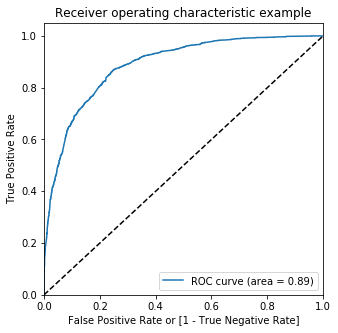

In [1316]:
draw_roc(y_train_pred_df.Converted, y_train_pred_df.Lead_Prob)

#### Finding the final Optimal Point 

In [1317]:
# Let's create columns with different probability cutoffs 
numbers = [float(x)/10 for x in range(10)]
for i in numbers:
    y_train_pred_df[i]= y_train_pred_df.Lead_Prob.map(lambda x: 1 if x > i else 0)
y_train_pred_df.head()

,Converted,Lead_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9
0,0,0.09,630949,0,1,0,0,0,0,0,0,0,0,0
1,0,0.63,649355,1,1,1,1,1,1,1,1,0,0,0
2,0,0.46,579735,0,1,1,1,1,1,0,0,0,0,0
3,1,0.75,614238,1,1,1,1,1,1,1,1,1,0,0
4,1,0.85,588625,1,1,1,1,1,1,1,1,1,1,0


In [1318]:
# Now let's calculate accuracy sensitivity and specificity for various probability cutoffs.
cutoff_df = pd.DataFrame( columns = ['prob','accuracy','sensitivity','specificity'])
from sklearn.metrics import confusion_matrix

num = [0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]
for i in num:
    cm1 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df[i] )
    total1=sum(sum(cm1))
    accuracy = (cm1[0,0]+cm1[1,1])/total1
    
    specificity = cm1[0,0]/(cm1[0,0]+cm1[0,1])
    sensitivity = cm1[1,1]/(cm1[1,0]+cm1[1,1])
    cutoff_df.loc[i] =[ i ,accuracy,sensitivity,specificity]
print(cutoff_df)

      prob  accuracy  sensitivity  specificity
0.00  0.00      0.39         1.00         0.00
0.10  0.10      0.64         0.97         0.43
0.20  0.20      0.75         0.92         0.65
0.30  0.30      0.80         0.87         0.75
0.40  0.40      0.81         0.76         0.84
0.50  0.50      0.81         0.69         0.89
0.60  0.60      0.81         0.63         0.92
0.70  0.70      0.78         0.51         0.95
0.80  0.80      0.76         0.42         0.97
0.90  0.90      0.71         0.27         0.99


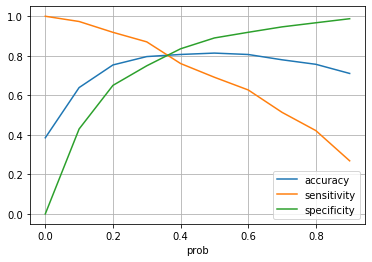

In [1319]:
# Let's plot accuracy sensitivity and specificity for various probabilities.
cutoff_df.plot.line(x='prob', y=['accuracy','sensitivity','specificity'])
plt.grid()
plt.show()

From the above curve, 0.35 seems to be the optimal point.

In [1320]:
y_train_pred_df['final_predicted'] = y_train_pred_df.Lead_Prob.map( lambda x: 1 if x > 0.35 else 0)

y_train_pred_df.head()

,Converted,Lead_Prob,Lead Number,predicted,0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9,final_predicted
0,0,0.09,630949,0,1,0,0,0,0,0,0,0,0,0,0
1,0,0.63,649355,1,1,1,1,1,1,1,1,0,0,0,1
2,0,0.46,579735,0,1,1,1,1,1,0,0,0,0,0,1
3,1,0.75,614238,1,1,1,1,1,1,1,1,1,0,0,1
4,1,0.85,588625,1,1,1,1,1,1,1,1,1,1,0,1


In [1321]:
# Let's check the overall accuracy.
print('Accuracy after changing the optimal point is',(metrics.accuracy_score(y_train_pred_df.Converted, y_train_pred_df.final_predicted))*100)

Accuracy after changing the optimal point is 79.95591245473153


In [1322]:
confusion2 = metrics.confusion_matrix(y_train_pred_df.Converted, y_train_pred_df.final_predicted )
confusion2

array([[3061,  844],
       [ 429, 2017]], dtype=int64)

In [1323]:
TP2 = confusion2[1,1] # true positive 
TN2 = confusion2[0,0] # true negatives
FP2 = confusion2[0,1] # false positives
FN2 = confusion2[1,0] # false negatives

In [1324]:
# Let's see the sensitivity of our logistic regression model
print('Sensitivity of the new model is',(TP2 / float(TP2+FN2))*100)

Sensitivity of the new model is 82.46116107931316


In [1325]:
# Let us calculate specificity

print('Specificity of the new model is',(TN2 / float(TN2+FP2))*100)

Specificity of the new model is 78.38668373879642


In [1326]:
# Calculate false postive rate - predicting as convrted when customer was not converted

print('False positive rate of the new model is',(FP2/ float(TN2+FP2))*100)

False positive rate of the new model is 21.613316261203586


In [1327]:
# Positive predictive value 
print ('Positive Predictive value is',(TP2 / float(TP2+FP2))*100)

Positive Predictive value is 70.4998252359315


In [1328]:
# Negative predictive value
print('Negative predictive value is',(TN2 / float(TN2 + FN2))*100)

Negative predictive value is 87.70773638968481


In [1329]:
from sklearn.metrics import precision_score, recall_score

In [1330]:
print('Recall is',(recall_score(y_train_pred_df.Converted, y_train_pred_df.predicted))*100)

Recall is 69.13327882256746


Metrics are changing the Optimal cut-off :
    1. Accuracy after changing the optimal point is 79.95591245473153
    2. Sensitivity is 82.0020222446916
    3. Specificity is 77.9123414071511
    4. False positive rate of the new model is 22.087658592848904
    5. Positive Predictive value is 67.92294807370183. This is the precision of the model. 
    6. Negative predictive value is 88.35840418574232
    7. Recall is 69.13327882256746
    

## 7. Making predictions on the test

In [1331]:
scaler = StandardScaler()

X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']] = scaler.fit_transform(X_test[['TotalVisits','Total Time Spent on Website','Page Views Per Visit']])

X_test.head()

,TotalVisits,Total Time Spent on Website,Page Views Per Visit,A free copy of Mastering The Interview,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Origin_Lead Import,Lead Source_Direct Traffic,Lead Source_Facebook,Lead Source_Google,...,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_Others,Last Activity_Page Visited on Website,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
628652,0.21,-0.59,0.85,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
644500,0.51,1.89,1.36,1,1,0,0,1,0,0,...,0,1,1,0,0,1,0,0,0,0
588935,-0.40,-0.74,-0.16,0,0,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
619437,-1.01,-0.88,-1.17,0,0,1,0,0,0,0,...,0,1,1,0,0,1,0,0,0,0
623381,1.43,-0.58,2.88,1,1,0,0,0,0,0,...,0,1,0,1,0,1,0,0,0,0


In [1332]:
X_test = X_test[col]
X_test.head()

,Total Time Spent on Website,Lead Origin_Landing Page Submission,Lead Origin_Lead Add Form,Lead Source_NC_EDM,Lead Source_Olark Chat,Lead Source_Reference,Lead Source_Social Media,Lead Source_Welingak Website,Last Notable Activity_Modified,Last Notable Activity_Others,...,Specialization_Human Resource Management,Specialization_Marketing Management,Specialization_Operations Management,Specialization_Others,City_Mumbai,City_Others,City_Thane & Outskirts,Last Activity_Email Opened,Last Activity_Olark Chat Conversation,Last Activity_SMS Sent
Lead Number,,,,,,,,,,,,,,,,,,,,,
628652,-0.59,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
644500,1.89,1,0,0,0,0,0,0,0,0,...,0,0,0,1,1,0,0,1,0,0
588935,-0.74,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
619437,-0.88,0,1,0,0,1,0,0,1,0,...,0,0,0,1,1,0,0,1,0,0
623381,-0.58,1,0,0,0,0,0,0,0,0,...,0,0,0,1,0,1,0,1,0,0


In [1333]:
X_test.columns 

Index(['Total Time Spent on Website', 'Lead Origin_Landing Page Submission',
       'Lead Origin_Lead Add Form', 'Lead Source_NC_EDM',
       'Lead Source_Olark Chat', 'Lead Source_Reference',
       'Lead Source_Social Media', 'Lead Source_Welingak Website',
       'Last Notable Activity_Modified', 'Last Notable Activity_Others',
       'Last Notable Activity_SMS Sent',
       'What is your current occupation_Others',
       'What is your current occupation_Unemployed',
       'What is your current occupation_Working Professional',
       'Specialization_Finance Management',
       'Specialization_Human Resource Management',
       'Specialization_Marketing Management',
       'Specialization_Operations Management', 'Specialization_Others',
       'City_Mumbai', 'City_Others', 'City_Thane & Outskirts',
       'Last Activity_Email Opened', 'Last Activity_Olark Chat Conversation',
       'Last Activity_SMS Sent'],
      dtype='object')

In [1334]:
X_test = X_test.drop(['Lead Origin_Lead Add Form','Lead Source_NC_EDM','Last Notable Activity_SMS Sent',
                     'Last Notable Activity_Others','City_Mumbai','City_Others',
                     'City_Thane & Outskirts','Lead Origin_Landing Page Submission','Specialization_Others',
                      'Specialization_Operations Management','Specialization_Human Resource Management',
                     'Lead Source_Social Media', 'Specialization_Finance Management'], axis = 1)

In [1335]:
X_test_sm = sm.add_constant(X_test)

In [1336]:
y_test_pred = res13.predict(X_test_sm)

In [1337]:
y_test_pred[:10]

Lead Number
628652   0.06
644500   0.98
588935   0.05
619437   0.78
623381   0.06
641959   0.67
599959   0.36
613711   0.38
619391   0.94
614597   0.20
dtype: float64

In [1338]:
# Converting y_pred to a dataframe which is an array
y_test_pred = pd.DataFrame(y_test_pred)

In [1339]:
# Let's see the head
y_test_pred.head()

,0
Lead Number,
628652,0.06
644500,0.98
588935,0.05
619437,0.78
623381,0.06


In [1340]:
# Converting y_test to dataframe

y_test_df = pd.DataFrame(y_test)

In [1341]:
# Putting Lead Number to index

y_test_df['Lead Number'] = y_test_df.index

In [1342]:
# Removing index for both dataframes to append them side by side 

y_test_pred.reset_index(drop=True, inplace=True)
y_test_df.reset_index(drop=True, inplace=True)

In [1343]:
# Appending y_test_df and y_pred_test
y_test_pred_df = pd.concat([y_test_df, y_test_pred],axis=1)

In [1344]:
y_test_pred_df.head()

,Converted,Lead Number,0
0,0,628652,0.06
1,1,644500,0.98
2,0,588935,0.05
3,1,619437,0.78
4,0,623381,0.06


In [1345]:
# Renaming the column 0 as Lead prob

y_test_pred_df= y_test_pred_df.rename(columns={ 0 : 'Lead_Prob'})

In [1346]:
# Let's see the head of y_pred_final

y_test_pred_df.head()

,Converted,Lead Number,Lead_Prob
0,0,628652,0.06
1,1,644500,0.98
2,0,588935,0.05
3,1,619437,0.78
4,0,623381,0.06


In [1347]:
y_test_pred_df['final_predicted'] = y_test_pred_df.Lead_Prob.map(lambda x: 1 if x > 0.35 else 0)

In [1348]:
y_test_pred_df.head()

,Converted,Lead Number,Lead_Prob,final_predicted
0,0,628652,0.06,0
1,1,644500,0.98,1
2,0,588935,0.05,0
3,1,619437,0.78,1
4,0,623381,0.06,0


In [1349]:
# Let's check the overall accuracy.

print('Accuracy is',(metrics.accuracy_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted))*100)

Accuracy is 79.3977230995226


In [1350]:
confusiontest = metrics.confusion_matrix(y_test_pred_df.Converted, y_test_pred_df.final_predicted )
confusiontest

array([[1351,  383],
       [ 178,  811]], dtype=int64)

In [1351]:
TP_test = confusiontest[1,1] # true positive 
TN_test = confusiontest[0,0] # true negatives
FP_test = confusiontest[0,1] # false positives
FN_test = confusiontest[1,0] # false negatives

In [1352]:
# Let's see the sensitivity of our logistic regression model

print('Sensitivity is',(TP_test / float(TP_test + FN_test))*100)

Sensitivity is 82.0020222446916


In [1353]:
print('Precision is ',(precision_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted))*100)

Precision is  67.92294807370183


In [1354]:
print('Recall is',(recall_score(y_test_pred_df.Converted, y_test_pred_df.final_predicted))*100)

Recall is 82.0020222446916


In [1355]:
# Let us calculate specificity

print('Specificity is ',(TN_test / float(TN_test + FP_test))*100)

Specificity is  77.9123414071511


In [1356]:
# Negative predictive value - out of all the negatives predicted, how many were actually negatives ? 

print('Out of all the negatives predicted by the model',(TN_test / float(TN_test+ FN_test))*100,'were correct')

Out of all the negatives predicted by the model 88.35840418574232 were correct


In [1357]:

print('False positive rate i.e. customers who were not converted and yet predicted as converted is',(FP_test/float(FP_test + TN_test)*100))

False positive rate i.e. customers who were not converted and yet predicted as converted is 22.087658592848904


**Metrics of the test set are** : 
    1. Accuracy is 79.39
    2. Sensitivity is 82.00
    3. Specificity is  77.91
    4. Precision is  67.92
    5. Recall is 82.00
    6. Out of all the negatives predicted by the model 88.35840418574232 were correct
    7. False positive rate i.e. customers who were not converted and yet predicted as converted is 22.087658592848904

## 8. Calculating Lead score for the entire dataset

Lead Score = 100 * ConversionProbability

ConversionProbability needs to be calculated for all the leads from the original dataset (Test + Train)

In [1358]:
y_test_pred_df.head()

,Converted,Lead Number,Lead_Prob,final_predicted
0,0,628652,0.06,0
1,1,644500,0.98,1
2,0,588935,0.05,0
3,1,619437,0.78,1
4,0,623381,0.06,0


In [1359]:
y_train_pred_final = y_train_pred_df.drop(['predicted',0.0,0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9], axis = 1)

In [1360]:
y_train_pred_final.rename(columns = {'LeadID':'Lead Number','Conversion_Prob':'Lead_Prob','predicted':'final_predicted'}, inplace = True) 
y_train_pred_final.head()

,Converted,Lead_Prob,Lead Number,final_predicted
0,0,0.09,630949,0
1,0,0.63,649355,1
2,0,0.46,579735,1
3,1,0.75,614238,1
4,1,0.85,588625,1


In [1361]:
y_test_pred_df.head()

,Converted,Lead Number,Lead_Prob,final_predicted
0,0,628652,0.06,0
1,1,644500,0.98,1
2,0,588935,0.05,0
3,1,619437,0.78,1
4,0,623381,0.06,0


### 8.1 Concatenating the train and the test dataset with the conversion probabilities

In [1362]:
# Concatenating the 2 dataframes train and test along the rows with the append() function

lead_full_pred = y_train_pred_final.append(y_test_pred_df)
lead_full_pred.head()

,Converted,Lead_Prob,Lead Number,final_predicted
0,0,0.09,630949,0
1,0,0.63,649355,1
2,0,0.46,579735,1
3,1,0.75,614238,1
4,1,0.85,588625,1


In [1363]:
# Inspecting the shape of the final dataframe and the test and train dataframes
print(y_train_pred_df.shape)
print(y_test_pred_df.shape)
print(lead_full_pred.shape)

(6351, 15)
(2723, 4)
(9074, 4)


In [1364]:
# Ensuring the Lead Numbers are unique for each lead in the final dataframe
len(lead_full_pred['Lead Number'].unique().tolist())

9074

In [1365]:
# Calculating the Lead Score value
# Lead Score = 100 * Conversion_Prob
lead_full_pred['Lead_Score'] = lead_full_pred['Lead_Prob'].apply(lambda x : round(x*100))
lead_full_pred.head()

,Converted,Lead_Prob,Lead Number,final_predicted,Lead_Score
0,0,0.09,630949,0,9
1,0,0.63,649355,1,63
2,0,0.46,579735,1,46
3,1,0.75,614238,1,75
4,1,0.85,588625,1,85


In [1366]:
# Inspecing the max Lead Number
lead_full_pred['Lead Number'].max()

660737

In [1367]:
# Inspecting the dataframe shape
lead_full_pred.shape

(9074, 5)

In [1368]:
# Inspecting if the final dataframe has any null values
round(100*(lead_full_pred.isnull().sum()/len(lead_full_pred)),2).sort_values(ascending=False)

Lead_Score        0.00
final_predicted   0.00
Lead Number       0.00
Lead_Prob         0.00
Converted         0.00
dtype: float64

### 8.2 Determining Feature Importance

In [1369]:
pd.options.display.float_format = '{:.2f}'.format
new_params = res13.params[1:]
new_params

Total Time Spent on Website                             1.12
Lead Source_Olark Chat                                  1.40
Lead Source_Reference                                   3.66
Lead Source_Welingak Website                            5.45
Last Notable Activity_Modified                         -0.73
What is your current occupation_Others                  1.41
What is your current occupation_Unemployed              1.22
What is your current occupation_Working Professional    3.67
Specialization_Marketing Management                     0.30
Last Activity_Email Opened                              0.42
Last Activity_Olark Chat Conversation                  -0.61
Last Activity_SMS Sent                                  1.48
dtype: float64

In [1370]:
# Getting a relative coeffient value for all the features wrt the feature with the highest coefficient
feature_importance = new_params
feature_importance = 100.0 * (feature_importance / feature_importance.max())
feature_importance = pd.DataFrame(feature_importance)
imp = feature_importance.reset_index()
imp.columns = ['Features', 'Importance']

sortedimp = imp.sort_values(by = 'Importance', ascending = False)


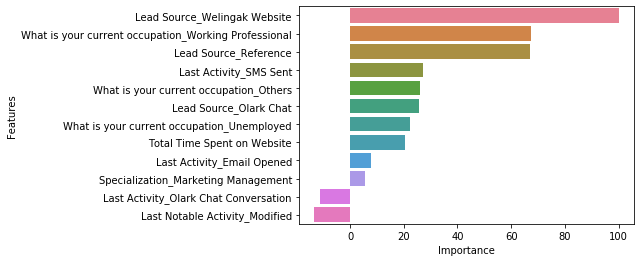

In [1371]:
sns.barplot(y='Features', x='Importance', palette='husl', data= sortedimp)

### 8.4 Selecting `Top 3` features which contribute most towards the probability of a lead getting converted

In [1372]:
pd.DataFrame(feature_importance).reset_index().sort_values(by=0,ascending=False).head(3)

,index,0
3,Lead Source_Welingak Website,100.00
7,What is your current occupation_Working Profes...,67.29
2,Lead Source_Reference,67.05


## Conclusion

#### Based on our model, some features are identified which contribute most to a Lead getting converted successfully. 

- Lead Source_Welingak Website
- What is your current occupation_Working Professional
- Lead Source_Reference
- Last Activity_SMS Sent
- What is your current occupation_Others
- Lead Source_Olark Chat
- What is your current occupation_Unemployed
- Total Time Spent on Website
- Last Activity_Email Opened
- Specialization_Marketing Management

The conversion probability of a lead increases with decrease in values of the following features in descending order:

|Features with Negative Coefficient Values|
|-------------|
|Last Activity_Olark Chat Conversation|
Last Notable Activity_Modified|                 


**The top three features are** : 
    1. Lead Source_Welingak Website
    2. What is your current occupation_Working Professional
    3. Lead Source_Reference                             


**Final Model**

Logodds = -2.5constant + 1.12*Total Time spent on website + 1.40*Lead Source_Olark Chat + 3.6554*Lead Source_Reference + 
5.4521*Lead Source_Welingak Website + (-0.7289)*Last Notable Activity_Modified + 1.4145*what is your current occupation_Others  + 1.2150*What is your current occupation_Unemployed  + 3.6688*What is your current occupation_Working Professional + 0.3018*Specialization_Marketing Management  +  0.4244*Last Activity_Email Opened + (-0.6056)*Last Activity_Olark Chat Conversation + 1.4775* Last Activity_SMS Sent                                                                                                                          

### Recommendations to X Education: 

1. Leads with Lead Source as reference to be contacted frequently. 

2. Leads from reference are low as compared to others such as Google but have high conversion rate. Hence, efforts must be put in to generate more leads through reference. Those who provide reference can be given incentives. This could generate more leads through reference

3. Leads from Welingak website have high rate of conversion but welingak websites has low number of leads overall. Efforts must be put to generate more leads through Welingak website. This could be through blogs, videos etc. on Welingak Website.

4. Target working professionals as working professional category has a high rate of conversion.

5. Minimize or curb all efforts on Olark Chat conversation as it has a negative correlation on conversion. 
